In [1]:
%matplotlib inline
import math,sys,os,numpy as np
from numpy.random import random
from matplotlib import pyplot as plt, rcParams, animation, rc
from ipywidgets import interact, interactive, fixed
from ipywidgets.widgets import *
rc('animation', html='html5')
rcParams['figure.figsize'] = 3, 3
%precision 4
np.set_printoptions(precision=4, linewidth=100)

In [2]:
def lin(a, b, x):
    return a * x + b

In [3]:
a = 3
b = 8
n = 30

In [4]:
x = random(n)
y = lin(a,b,x)

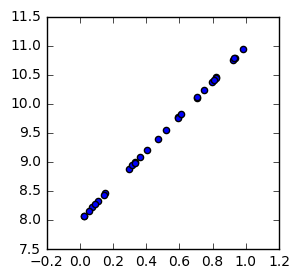

In [5]:
plt.scatter(x,y)
plt.show()

In [6]:
def sse(y, y_pred):
    return np.sqrt((y-y_pred)**2).sum()

In [7]:
def loss(y,a,b,x):
    y_pred = lin(a,b,x)
    loss = sse(y,y_pred)
    return loss

In [8]:
def avg_loss(y,a,b,x):
    return np.sqrt(loss(y,a,b,x)/n)

In [9]:
a_guess = 1
b_guess = 2

In [10]:
avg_loss(y,a_guess,b_guess,x)

2.6416

In [11]:
lr = 0.01

In [12]:
def update():
    global a_guess,b_guess
    y_pred = lin(a_guess,b_guess,x)
    dlossdb = 2 * (y_pred - y)
    dlossda = x * dlossdb
    a_guess -= lr * dlossda.mean()
    b_guess -= lr * dlossdb.mean()

In [13]:
# for i in range(10):
#     update()

In [14]:
# print a_guess,b_guess

In [17]:
fig = plt.figure(dpi=100,figsize=(5,4))
plt.scatter(x,y)
line, = plt.plot(x,lin(a_guess,b_guess,x))
# plt.show()
plt.close()

def animate(i):
    line.set_ydata(lin(a_guess,b_guess,x))
    for i in range(10):
        update()
    return line,

In [ ]:
ani = animation.FuncAnimation(fig, animate, np.arange(0, 40), interval=100)
ani